In [1]:
############## Importing Libraries ##############
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Strings "?" to recognize as NA/NaN
missing_value_formats = ["?"]

In [3]:
############## Importing Dataset ##############
dataset = pd.read_csv('cell2celltrain_Small_6k.csv', na_values = missing_value_formats)

## General Data Exploration

In [4]:
dataset.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,IncomeGroup,OwnsMotorcycle,AdjustmentsToCreditRating,HandsetPrice,MadeCallToRetentionTeam,CreditRating,PrizmCode,Occupation,MaritalStatus,Churn
0,30.88,436.0,30.0,0.25,1.0,0.0,-112.0,0.1,11.0,0.3,...,8,No,0,150.0,No,2-High,Other,Other,Yes,Yes
1,44.83,172.0,45.0,0.00,0.0,0.0,-12.0,-15.5,0.3,0.3,...,7,No,0,80.0,No,2-High,Suburban,Other,No,No
2,42.63,838.0,50.0,0.74,5.0,0.0,28.0,-2.6,4.7,6.3,...,0,No,0,130.0,No,5-Low,Suburban,Other,NaN,No
3,33.49,358.0,50.0,0.00,0.0,0.0,-16.0,0.0,1.0,4.0,...,8,No,0,150.0,No,2-High,Town,Other,Yes,No
4,60.94,1276.0,60.0,4.70,0.0,0.0,-188.0,0.2,5.7,19.7,...,0,No,0,30.0,No,5-Low,Other,Other,NaN,No


In [5]:
dataset.columns

Index(['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge',
       'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls',
       'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls',
       'BlockedCalls', 'UnsweredCalls', 'CustomerCareCalls', 'ThreewayCalls',
       'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut',
       'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls',
       'CallWaitingCalls', 'MonthsInService', 'UniqueSubs', 'ActiveSubs',
       'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays',
       'AgeHH1', 'AgeHH2', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'RetentionCalls',
       'RetentionOffersAccepted', 'NewCellphoneUser', 'NotNewCellphoneUser',
       'ReferralsMadeBySubscriber', 'IncomeGroup', 'OwnsMotorcycle',
  

In [6]:
dataset.shape

(6380, 57)

In [7]:
dataset.dtypes

MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
OverageMinutes               float64
RoamingCalls                 float64
PercChangeMinutes            float64
PercChangeRevenues           float64
DroppedCalls                 float64
BlockedCalls                 float64
UnsweredCalls                float64
CustomerCareCalls            float64
ThreewayCalls                float64
ReceivedCalls                float64
OutboundCalls                float64
InboundCalls                 float64
PeakCallsInOut               float64
OffPeakCallsInOut            float64
DroppedBlockedCalls          float64
CallForwardingCalls          float64
CallWaitingCalls             float64
MonthsInService                int64
UniqueSubs                     int64
ActiveSubs                     int64
ServiceArea                   object
Handsets                       int64
HandsetModels                  int64
C

In [8]:
dataset.columns.to_series().groupby(dataset.dtypes).groups

{int64: ['MonthsInService', 'UniqueSubs', 'ActiveSubs', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'RetentionCalls', 'RetentionOffersAccepted', 'ReferralsMadeBySubscriber', 'IncomeGroup', 'AdjustmentsToCreditRating'], float64: ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'DroppedCalls', 'BlockedCalls', 'UnsweredCalls', 'CustomerCareCalls', 'ThreewayCalls', 'ReceivedCalls', 'OutboundCalls', 'InboundCalls', 'PeakCallsInOut', 'OffPeakCallsInOut', 'DroppedBlockedCalls', 'CallForwardingCalls', 'CallWaitingCalls', 'AgeHH1', 'AgeHH2', 'HandsetPrice'], object: ['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished', 'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership', 'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings', 'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser', 'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam'

### Looking for Null Values

In [9]:
# Prints information about the DataFrame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6380 entries, 0 to 6379
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             6359 non-null   float64
 1   MonthlyMinutes             6359 non-null   float64
 2   TotalRecurringCharge       6359 non-null   float64
 3   DirectorAssistedCalls      6359 non-null   float64
 4   OverageMinutes             6359 non-null   float64
 5   RoamingCalls               6359 non-null   float64
 6   PercChangeMinutes          6338 non-null   float64
 7   PercChangeRevenues         6338 non-null   float64
 8   DroppedCalls               6380 non-null   float64
 9   BlockedCalls               6380 non-null   float64
 10  UnsweredCalls              6380 non-null   float64
 11  CustomerCareCalls          6380 non-null   float64
 12  ThreewayCalls              6380 non-null   float64
 13  ReceivedCalls              6380 non-null   float

In [10]:
# Yes, there are null values in the columns marked as True below
dataset.isna().any()

MonthlyRevenue                True
MonthlyMinutes                True
TotalRecurringCharge          True
DirectorAssistedCalls         True
OverageMinutes                True
RoamingCalls                  True
PercChangeMinutes             True
PercChangeRevenues            True
DroppedCalls                 False
BlockedCalls                 False
UnsweredCalls                False
CustomerCareCalls            False
ThreewayCalls                False
ReceivedCalls                False
OutboundCalls                False
InboundCalls                 False
PeakCallsInOut               False
OffPeakCallsInOut            False
DroppedBlockedCalls          False
CallForwardingCalls          False
CallWaitingCalls             False
MonthsInService              False
UniqueSubs                   False
ActiveSubs                   False
ServiceArea                   True
Handsets                     False
HandsetModels                False
CurrentEquipmentDays         False
AgeHH1              

In [11]:
# How many Null values are there in each column?
dataset.isna().sum()

MonthlyRevenue                 21
MonthlyMinutes                 21
TotalRecurringCharge           21
DirectorAssistedCalls          21
OverageMinutes                 21
RoamingCalls                   21
PercChangeMinutes              42
PercChangeRevenues             42
DroppedCalls                    0
BlockedCalls                    0
UnsweredCalls                   0
CustomerCareCalls               0
ThreewayCalls                   0
ReceivedCalls                   0
OutboundCalls                   0
InboundCalls                    0
PeakCallsInOut                  0
OffPeakCallsInOut               0
DroppedBlockedCalls             0
CallForwardingCalls             0
CallWaitingCalls                0
MonthsInService                 0
UniqueSubs                      0
ActiveSubs                      0
ServiceArea                     3
Handsets                        0
HandsetModels                   0
CurrentEquipmentDays            0
AgeHH1                        110
AgeHH2        

In [12]:
# How many Unique values are there in each column and what are those unique values?
for i in dataset.columns:
    print(f"Unique {i}'s count: {dataset[i].nunique()}")
    print(f"{dataset[i].unique()}\n")

Unique MonthlyRevenue's count: 4065
[ 30.88  44.83  42.63 ...  12.29  99.61 103.63]

Unique MonthlyMinutes's count: 1618
[ 436.  172.  838. ... 2183. 2821. 1071.]

Unique TotalRecurringCharge's count: 152
[ 30.  45.  50.  60.  55.  22.  40.  10.  32.  38.  44. 102.  70.  20.
  54.  72.  57.  42.  46.  82.  25.   0.  95.  68.  15.  17.  83.  59.
  93.  52.  36.  90.  86.  58.  34.  29.  75.  63.  67. 120. 135.   2.
  28.  74.  35.  80.  85.  21.  56. 142. 150.  77.  61. 111.  76.  nan
  92.  43.  48.  66. 140.  16.  49.  96. 108. 110. 112.  37. 118.  53.
  89.   6.  78.  47.  12.  19.  81.  41.  71.  39.   5. 100.  65.  51.
  13. 105.  88.  23. 121.   8.  33. 115.  79.  98.   7.  64.  14. 126.
 160.  84. 101.  27.  69. 400.  91.  31.  -6.  62.  24. 149.  18.  99.
 175. 145. 144.  73.  26. 274.   9. 213. 161. 125.   3. 104. 138.  87.
 186.  11. 107. 130. 180.  97.  94. 137. 210. 132. 202.  -2. 195. 170.
 119. 147. 312. 136.   1. 139. 122. 134. 153. 117. 103. 116. 151.]

Unique DirectorAs

In [13]:
# Does the dataset upholds any class imbalance issues?
dataset["Churn"].value_counts()

No     4569
Yes    1811
Name: Churn, dtype: int64

## Dealing with Missing Values

In [14]:
dataset["MonthlyRevenue"].value_counts()

29.99     136
34.99     101
30.26      59
49.99      47
10.00      46
         ... 
93.24       1
57.31       1
94.14       1
47.75       1
103.63      1
Name: MonthlyRevenue, Length: 4065, dtype: int64

In [15]:
# 0.329% of the Missing value in "MonthlyRevenue" column
# Replace the missing value with the mean 

dataset['MonthlyRevenue'] = dataset['MonthlyRevenue'].fillna(dataset['MonthlyRevenue'].mean()).round(2)

# Checking if still there is any Null value left
dataset["MonthlyRevenue"].isnull().sum()

0

In [16]:
dataset["MonthlyMinutes"].value_counts()

0.0       102
2.0        28
96.0       20
18.0       19
134.0      19
         ... 
1370.0      1
2738.0      1
665.0       1
959.0       1
1071.0      1
Name: MonthlyMinutes, Length: 1618, dtype: int64

In [17]:
# 0.329% of the Missing value in "MonthlyMinutes" column
# Replace the missing value with the mean 

dataset['MonthlyMinutes'] = dataset['MonthlyMinutes'].fillna(dataset['MonthlyMinutes'].mean()).round(1)

# Checking if still there is any Null value left
dataset["MonthlyMinutes"].isnull().sum()

0

In [18]:
dataset["TotalRecurringCharge"].value_counts()

30.0     922
45.0     828
40.0     561
60.0     531
50.0     525
        ... 
186.0      1
107.0      1
180.0      1
94.0       1
151.0      1
Name: TotalRecurringCharge, Length: 152, dtype: int64

In [19]:
# 0.329% of the Missing value in "TotalRecurringCharge" column
# Replace the missing value with the mean 

dataset['TotalRecurringCharge'] = dataset['TotalRecurringCharge'].fillna(dataset['TotalRecurringCharge'].mean()).round(1)

# Checking if still there is any Null value left
dataset["TotalRecurringCharge"].isnull().sum()

0

In [20]:
dataset["DirectorAssistedCalls"].value_counts()

0.00     2997
0.25      827
0.50      508
0.74      369
0.99      246
         ... 
19.55       1
15.84       1
45.05       1
11.14       1
20.30       1
Name: DirectorAssistedCalls, Length: 85, dtype: int64

In [21]:
# 0.329% of the Missing value in "DirectorAssistedCalls" column
# Replace the missing value with the mean 

dataset['DirectorAssistedCalls'] = dataset['DirectorAssistedCalls'].fillna(dataset['DirectorAssistedCalls'].mean()).round(2)

# Checking if still there is any Null value left
dataset["DirectorAssistedCalls"].isnull().sum()

0

In [22]:
dataset["OverageMinutes"].value_counts()

0.0      2928
2.0       142
1.0       119
4.0        95
6.0        78
         ... 
570.0       1
329.0       1
363.0       1
255.0       1
478.0       1
Name: OverageMinutes, Length: 376, dtype: int64

In [23]:
# 0.329% of the Missing value in "OverageMinutes" column
# Replace the missing value with the mean 

dataset['OverageMinutes'] = dataset['OverageMinutes'].fillna(dataset['OverageMinutes'].mean()).round(1)

# Checking if still there is any Null value left
dataset["OverageMinutes"].isnull().sum()

0

In [24]:
dataset["RoamingCalls"].value_counts()

0.0     4396
0.2      216
0.1      176
0.3      147
0.5      117
        ... 
36.4       1
23.0       1
10.7       1
44.9       1
40.4       1
Name: RoamingCalls, Length: 229, dtype: int64

In [25]:
# 0.329% of the Missing value in "RoamingCalls" column
# Replace the missing value with the mean 

dataset['RoamingCalls'] = dataset['RoamingCalls'].fillna(dataset['RoamingCalls'].mean()).round(1)

# Checking if still there is any Null value left
dataset["RoamingCalls"].isnull().sum()

0

In [26]:
dataset["PercChangeMinutes"].value_counts()

 0.0      163
-2.0       65
-6.0       57
-4.0       55
-8.0       53
         ... 
 484.0      1
-582.0      1
 209.0      1
-494.0      1
-414.0      1
Name: PercChangeMinutes, Length: 1159, dtype: int64

In [27]:
# 0.658% of the Missing value in "PercChangeMinutes" column
# Replace the missing value with the mean 

dataset['PercChangeMinutes'] = dataset['PercChangeMinutes'].fillna(dataset['PercChangeMinutes'].mean()).round(1)

# Checking if still there is any Null value left
dataset["PercChangeMinutes"].isnull().sum()

0

In [28]:
dataset["PercChangeRevenues"].value_counts()             

 0.0     717
-0.2     190
-0.3     180
-0.5     114
-0.4      83
        ... 
 59.7      1
 93.8      1
-69.9      1
-63.4      1
 75.7      1
Name: PercChangeRevenues, Length: 1328, dtype: int64

In [29]:
# 0.658% of the Missing value in "PercChangeRevenues" column
# Replace the missing value with the mean 

dataset['PercChangeRevenues'] = dataset['PercChangeRevenues'].fillna(dataset['PercChangeRevenues'].mean()).round(1)

# Checking if still there is any Null value left
dataset["PercChangeRevenues"].isnull().sum()

0

In [30]:
dataset["ServiceArea"].value_counts()

NYCBRO917    204
DALDAL214    191
HOUHOU281    160
NYCMAN917    143
APCFCH703    116
            ... 
LAXPSG760      1
SANCOC254      1
SHEFTR540      1
NORZIM763      1
PHIGEO302      1
Name: ServiceArea, Length: 519, dtype: int64

In [31]:
# 0.047% of the Missing value in "ServiceArea" column
# Replace the missing value with the mean 

dataset['ServiceArea'] = dataset['ServiceArea'].fillna(dataset['ServiceArea'].value_counts().index[0])

# Checking if still there is any Null value left
dataset["ServiceArea"].isnull().sum()

0

In [32]:
dataset["AgeHH1"].value_counts()             

0.0     1767
36.0     272
50.0     263
40.0     261
42.0     257
46.0     255
38.0     249
30.0     240
44.0     239
52.0     229
34.0     229
48.0     221
32.0     221
54.0     220
28.0     195
26.0     190
56.0     171
58.0     127
60.0     115
24.0     107
22.0      62
62.0      58
64.0      53
66.0      37
20.0      34
68.0      33
72.0      32
70.0      29
74.0      24
76.0      23
80.0      14
82.0      11
78.0      10
84.0       7
18.0       4
88.0       3
86.0       3
94.0       2
90.0       2
98.0       1
Name: AgeHH1, dtype: int64

In [33]:
# 1.72% of the Missing value in "AgeHH1" column
# Replace the missing value with the mean 

dataset['AgeHH1'] = dataset['AgeHH1'].fillna(dataset['AgeHH1'].mean()).round(1)

# Checking if still there is any Null value left
dataset["AgeHH1"].isnull().sum()

0

In [34]:
dataset["AgeHH2"].value_counts()             

0.0     3273
46.0     190
52.0     180
42.0     168
36.0     167
40.0     160
30.0     160
48.0     160
44.0     157
50.0     150
34.0     149
38.0     140
54.0     130
32.0     125
56.0     103
28.0     101
26.0      97
24.0      68
58.0      68
60.0      63
22.0      54
62.0      53
20.0      44
66.0      39
64.0      38
70.0      36
68.0      33
74.0      29
72.0      28
18.0      24
76.0      21
78.0      18
80.0      15
82.0       9
88.0       8
86.0       4
90.0       2
84.0       2
92.0       1
96.0       1
98.0       1
94.0       1
Name: AgeHH2, dtype: int64

In [35]:
# 1.72% of the Missing value in "AgeHH2" column
# Replace the missing value with the mean 

dataset['AgeHH2'] = dataset['AgeHH2'].fillna(dataset['AgeHH2'].mean()).round(1)

# Checking if still there is any Null value left
dataset["AgeHH2"].isnull().sum()

0

In [36]:
dataset["Homeownership"].value_counts()

Known    4259
Name: Homeownership, dtype: int64

In [37]:
# 33.244% of the Missing value in "Homeownership" column
# Replace the missing value with the mean 

dataset['Homeownership'] = dataset['Homeownership'].fillna(dataset['Homeownership'].value_counts().index[0])

# Checking if still there is any Null value left
dataset["Homeownership"].isnull().sum()

0

In [38]:
dataset["HandsetPrice"].value_counts()

30.0     910
150.0    518
130.0    250
80.0     245
10.0     240
60.0     233
100.0    165
200.0    162
40.0      32
400.0     11
250.0      6
300.0      3
500.0      2
240.0      2
180.0      2
Name: HandsetPrice, dtype: int64

In [39]:
# 56.411% (less than 60%) of the Missing value in "HandsetPrice" column
# Replace the missing value with the mean 

dataset['HandsetPrice'] = dataset['HandsetPrice'].fillna(dataset['HandsetPrice'].value_counts().index[0])

# Checking if still there is any Null value left
dataset["HandsetPrice"].isnull().sum()

0

In [40]:
dataset["MaritalStatus"].value_counts()

Yes    2367
No     1576
Name: MaritalStatus, dtype: int64

In [41]:
# 38.197% of the Missing value in "MaritalStatus" column
# Replace the missing value with the mean 

dataset['MaritalStatus'] = dataset['MaritalStatus'].fillna(dataset['MaritalStatus'].value_counts().index[0])

# Checking if still there is any Null value left
dataset["MaritalStatus"].isnull().sum()

0

In [42]:
dataset["Churn"].value_counts()

No     4569
Yes    1811
Name: Churn, dtype: int64

<AxesSubplot:xlabel='Churn', ylabel='count'>

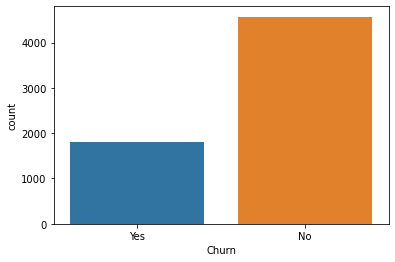

In [43]:
# Target variable distribution is showing that the dataset is imbalanced:
sns.countplot(x=dataset.Churn)

In [44]:
# To save the cleaned dataset to your preferred location, please change the file location
# This dataset will be used in Step 2: Data Preprocessing

dataset.to_csv(r'C:\Users\Admin\Downloads\Dataset.csv', index = False)